In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("C:/Users/LENOVO/Downloads/delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data[data.duplicated()]

,Delivery Time,Sorting Time


{'whiskers': [<matplotlib.lines.Line2D at 0x1d1cf33f760>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1cf33fca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1cf33f4c0>,
 'medians': [<matplotlib.lines.Line2D at 0x1d1cf3ac220>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d1cf3ac4c0>,
 'means': []}

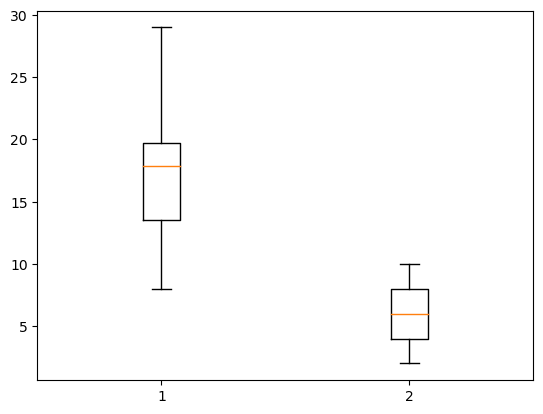

In [5]:
plt.boxplot(data)

In [6]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [7]:
import seaborn as sns

<Axes: >

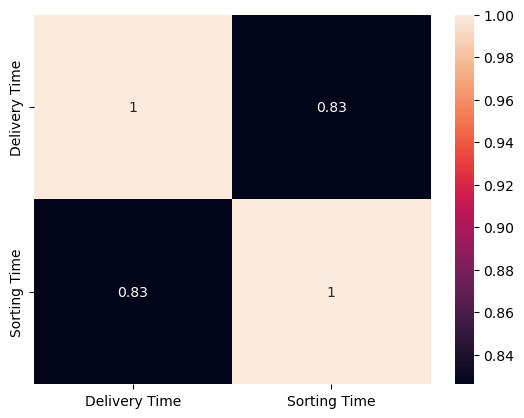

In [8]:
sns.heatmap(data.corr(), annot=True)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = scaler.fit_transform(data)
scaled_df=pd.DataFrame(df1,columns=data.columns)
scaled_df.head()

,Delivery Time,Sorting Time
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,1.000


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
df2 = scaler.fit_transform(data)
scaled_df = pd.DataFrame(df2, columns = data.columns)
scaled_df.head()

,Delivery Time,Sorting Time
0,0.849867,1.535625
1,-0.664490,-0.882984
2,0.597474,-0.076781
3,1.455610,1.132523
4,2.465181,1.535625


In [52]:
data=data.rename({'delivery time':'Delivery_Time', 'sorting time':'Sorting_Time'},axis=1)
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [54]:
import statsmodels.formula.api as smf
model = smf.ols(formula ='Delivery_Time~Sorting_Time', data = data).fit()

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           3.98e-06
Time:                        18:32:51   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

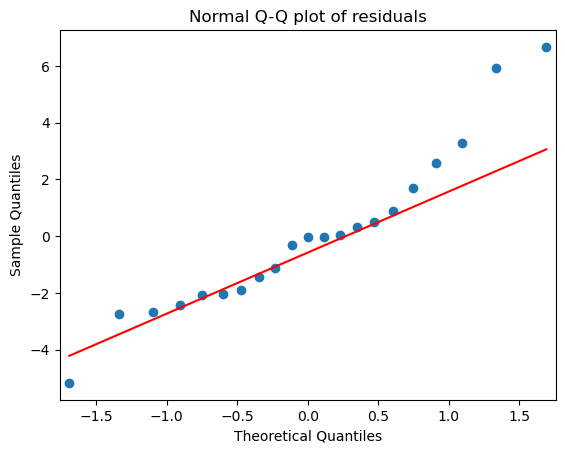

In [56]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [57]:
np.where(model.resid>10)

(array([], dtype=int64),)

In [58]:
def get_standardize_values(vals):
    return (vals - vals.mean())/vals.std()

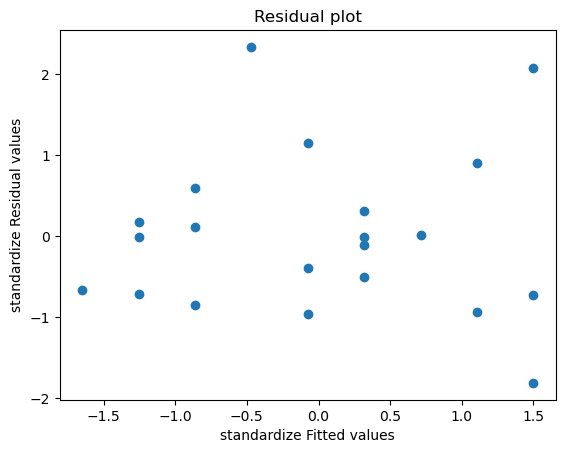

In [59]:
plt.scatter(get_standardize_values(model.fittedvalues), get_standardize_values(model.resid))
plt.ylabel('standardize Residual values')
plt.xlabel('standardize Fitted values')
plt.title('Residual plot')
plt.show()

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

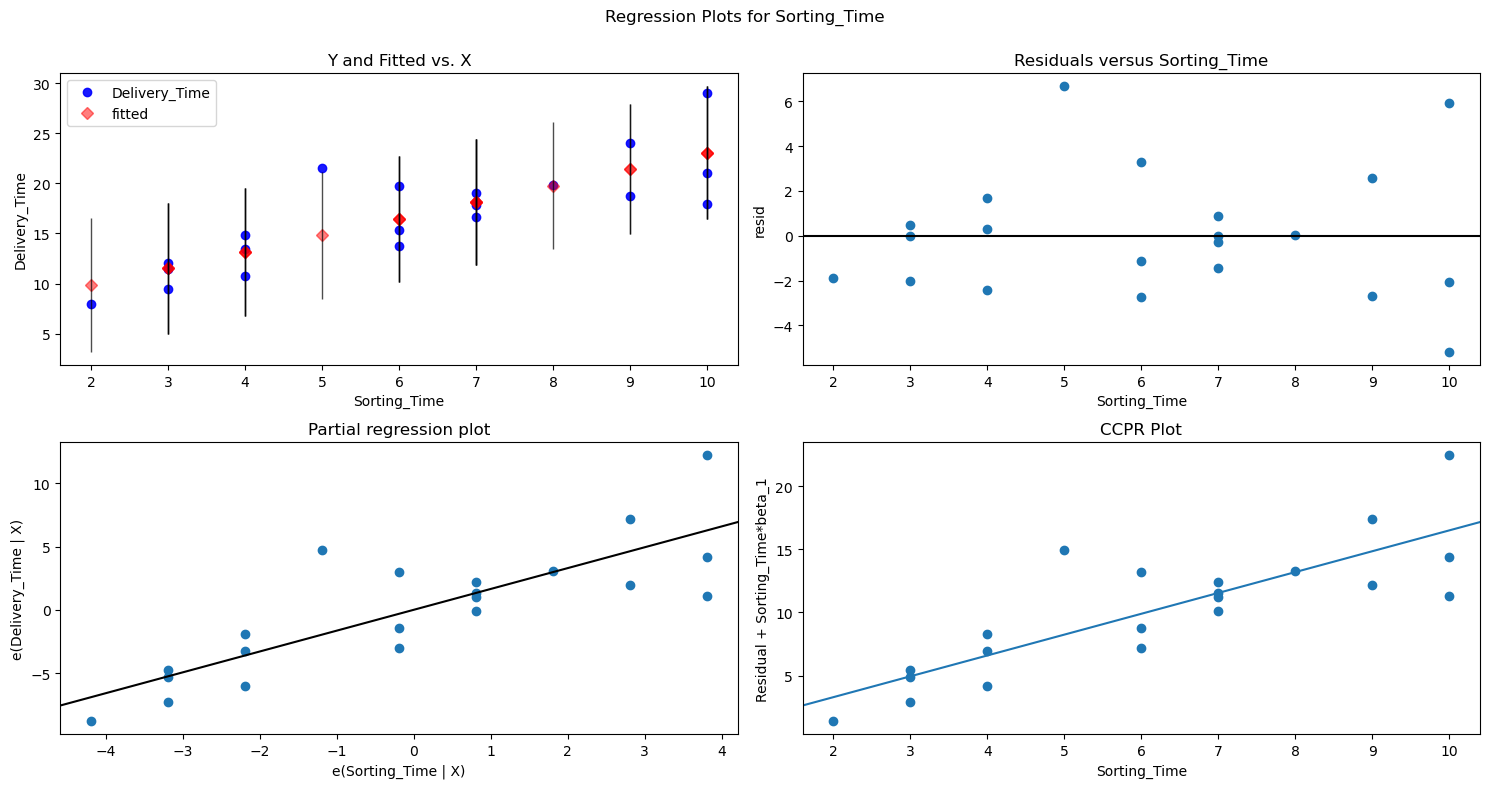

In [64]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Sorting_Time", fig=fig)
plt.show

In [65]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

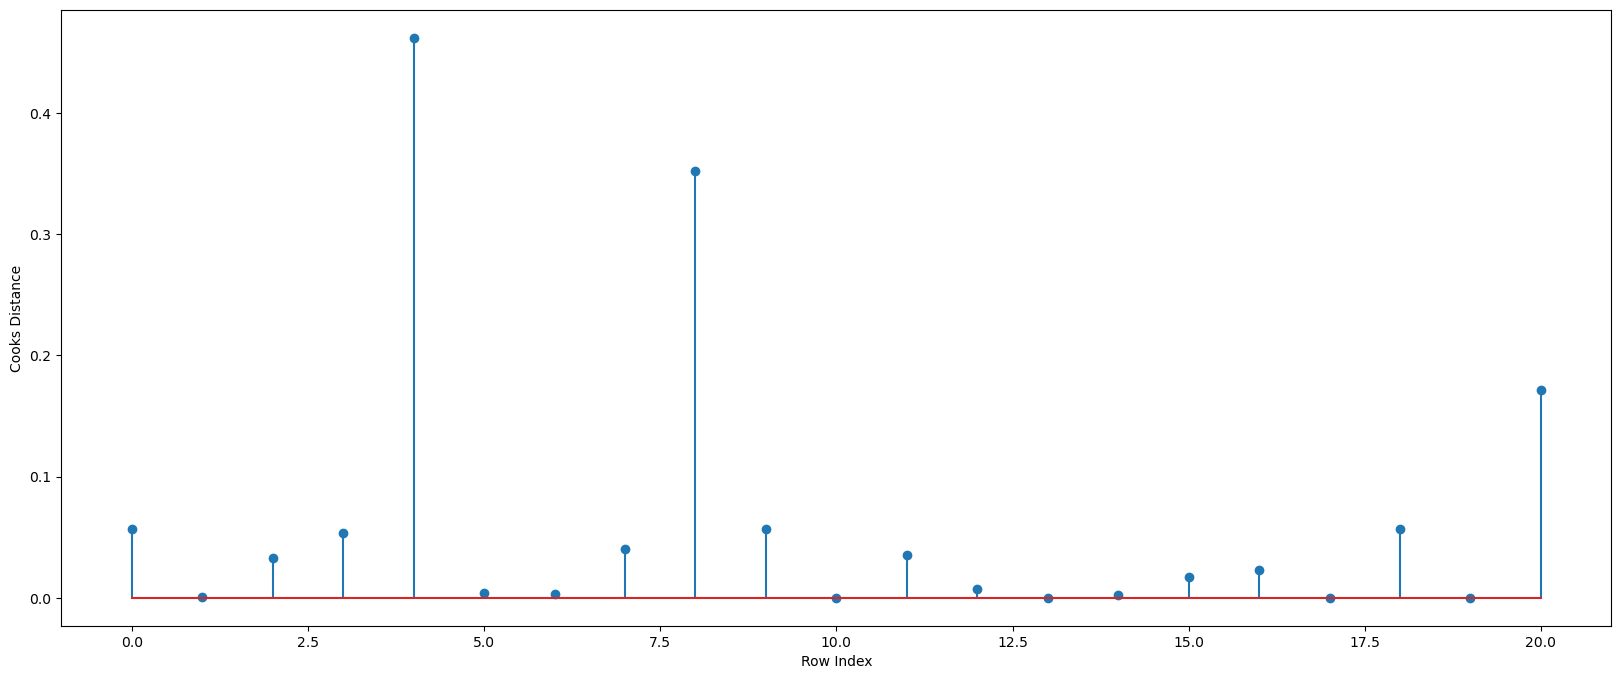

In [66]:
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [67]:
(np.argmax(c), np.max(c))

(4, 0.46205304126503155)

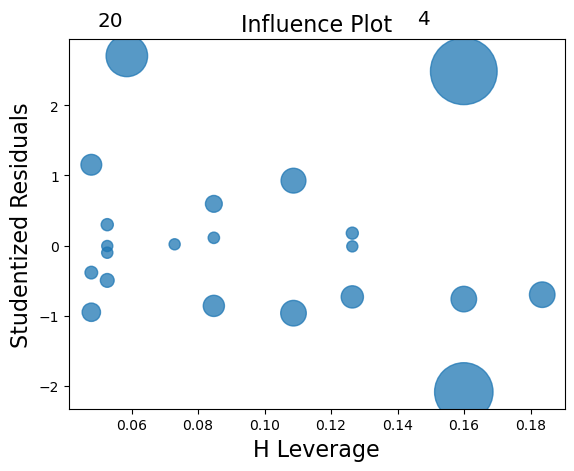

In [68]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [69]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*(k+1)/n
leverage_cutoff

0.42857142857142855

In [72]:
final_ml_v=smf.ols(formula = 'Delivery_Time~Sorting_Time', data = data).fit()

In [73]:
(final_ml_v.rsquared, final_ml_v.aic)

(0.6822714748417231, 106.71400170798609)

In [74]:
newdata = pd.Series([5,10])

In [78]:
data_pred = pd.DataFrame(newdata, columns = ['Sorting_Time'])

In [79]:
data_pred

,Sorting_Time
0,5
1,10


In [80]:
model.predict(data_pred)

0    14.827833
1    23.072933
dtype: float64